In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [91]:
#Читаю датасет
df = pd.read_csv('/home/s2pac/ElbrusBootcamp/project/data/data.csv')

df.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [92]:

# Фильтруем строки, где "Можно с детьми/животными" равно NaN
nan_children_pets = df[df['Парковка'].isna()]

# Получаем ссылки на объявления
listing_links = nan_children_pets['Ссылка на объявление'].tolist()

# Выводим ссылки
print("Ссылки на объявления, где 'Можно с детьми/животными' равно NaN:")
for link in listing_links:
    print(link)

Ссылки на объявления, где 'Можно с детьми/животными' равно NaN:
https://www.cian.ru/rent/flat/273614615
https://www.cian.ru/rent/flat/274837728
https://www.cian.ru/rent/flat/273999490
https://www.cian.ru/rent/flat/274017037
https://www.cian.ru/rent/flat/273231024
https://www.cian.ru/rent/flat/274767901
https://www.cian.ru/rent/flat/274995950
https://www.cian.ru/rent/flat/274945807
https://www.cian.ru/rent/flat/274748017
https://www.cian.ru/rent/flat/273941734
https://www.cian.ru/rent/flat/274849101
https://www.cian.ru/rent/flat/223918678
https://www.cian.ru/rent/flat/272612966
https://www.cian.ru/rent/flat/271568490
https://www.cian.ru/rent/flat/264664760
https://www.cian.ru/rent/flat/272188531
https://www.cian.ru/rent/flat/272727784
https://www.cian.ru/rent/flat/267110043
https://www.cian.ru/rent/flat/265804792
https://www.cian.ru/rent/flat/239000408
https://www.cian.ru/rent/flat/271209314
https://www.cian.ru/rent/flat/269889430
https://www.cian.ru/rent/flat/241704098
https://www.cian

In [93]:
#Удаляю строки, если в адресе нет Москвы
df = df[df['Адрес'].str.lower().str.contains('москва')]
print(f"Количество строк после фильтрации: {df.shape[0]}")
df.head(3)

Количество строк после фильтрации: 19737


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [94]:
df = df[df['Адрес'].str.lower().str.contains('моск', na=False)]

# Функция для очистки строки с ценой
def clean_price(price_str):
    if pd.isna(price_str):
        return np.nan
    # Оставляем только цифры и запятую
    digits = re.findall(r'[\d.,]+', price_str)
    if digits:
        # Преобразуем в float, заменяя запятую на точку
        return float(digits[0].replace(',', '.'))
    return np.nan

# Применяем функцию очистки к колонке "Цена"
df['Цена'] = df['Цена'].apply(clean_price)

# Теперь можно группировать данные по адресу и вычислять среднюю цену
price_by_address = df.groupby('Адрес')['Цена'].mean().reset_index()

# Сортируем по цене
price_by_address = price_by_address.sort_values(by='Цена', ascending=False)

# Выводим результаты
print(price_by_address.head(10))

                                      Адрес          Цена
1467        Москва, Бутиковский переулок, 5  3.000000e+06
4192      Москва, Несвижский переулок, 12К1  2.000000e+06
7252             Москва, переулок Хилков, 1  1.742857e+06
6253            Москва, Трубная улица, 23К2  1.500000e+06
8899             Москва, улица Косыгина, 19  1.500000e+06
3731     Москва, Малая Бронная улица, 27/14  1.500000e+06
48    Москва, 1-й Обыденский переулок, 12С1  1.400000e+06
3984           Москва, Молочный переулок, 1  1.375000e+06
9822          Москва, улица Пречистенка, 27  1.333333e+06
8634           Москва, улица Ефремова, 10к1  1.250000e+06


/tmp/ipykernel_66464/1562184943.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Парковка', y='Цена', data=price_by_parking, palette='viridis')


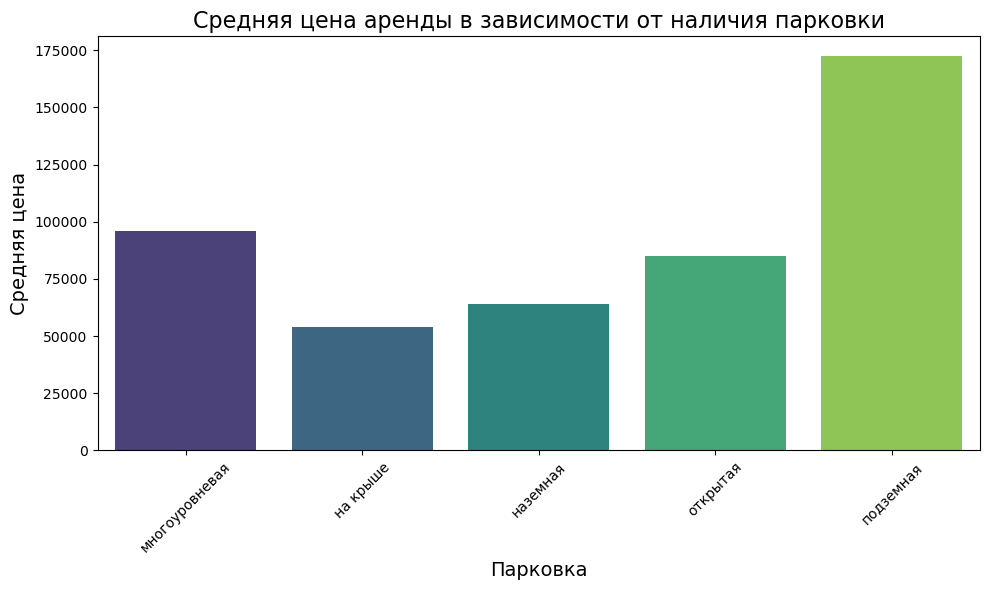

In [95]:

# Фильтруем данные по адресу
df = df[df['Адрес'].str.lower().str.contains('моск', na=False)]

# Функция для очистки строки с ценой
def clean_price(price_str):
    if pd.isna(price_str):  # Проверяем на NaN
        return np.nan
    if isinstance(price_str, float):  # Если это float, возвращаем его как есть
        return price_str
    # Оставляем только цифры и запятую
    digits = re.findall(r'[\d.,]+', price_str)
    if digits:
        # Преобразуем в float, заменяя запятую на точку
        return float(digits[0].replace(',', '.'))
    return np.nan

# Применяем функцию очистки к колонке "Цена"
df['Цена'] = df['Цена'].apply(clean_price)

# Группируем данные по наличию парковки и вычисляем среднюю цену
price_by_parking = df.groupby('Парковка')['Цена'].mean().reset_index()

# Создаем график
plt.figure(figsize=(10, 6))
sns.barplot(x='Парковка', y='Цена', data=price_by_parking, palette='viridis')
plt.title('Средняя цена аренды в зависимости от наличия парковки', fontsize=16)
plt.xlabel('Парковка', fontsize=14)
plt.ylabel('Средняя цена', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
#Удаляю лишние колонки, которые не нужны для анализа
df.drop(columns=["Unnamed: 0", "Телефоны", "Описание", "Ссылка на объявление", "Серия дома", "Название ЖК", "Тип"], inplace=True)
df.head(3)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,500000.0,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,500000.0,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,500000.0,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN


In [99]:
#Проверяю на дубликаты
df.duplicated().sum().tolist()

0

In [105]:
df['Можно с детьми/животными']
df.head(3)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,500000.0,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,500000.0,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,500000.0,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN


In [106]:
df["Количество комнат"].unique().tolist()

#Проверяю количество пропущенных значений в колонке "Количество комнат"
df["Количество комнат"].isnull().sum()


np.int64(535)

In [107]:
#Обрабатываю колонку "Можно с детьми/животными" - приводя ее к числовым значениям

#0 - нельзя ни с кем
#1 - можно с детьми
#2 - можно с животными
#3 - можно с детьми и животными

df['Можно с детьми/животными']
#Если в колонке "Можно с детьми/животными" nan, то заменяю на 0
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna(0)

df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna(0)
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].replace({
    'Можно с детьми': 1,
    'Можно с животными': 2,
    'Можно с детьми, Можно с животными': 3
})


/tmp/ipykernel_66464/2237636576.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Можно с детьми/животными'] = df['Можно с детьми/животными'].replace({


In [108]:
df['Можно с детьми/животными'].unique()

array([3, 1, 2, 0])